In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Principal Component Analysis

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Using PCA in 2-D (?) to understand its concept.

Imagine a dataset with the following composition:

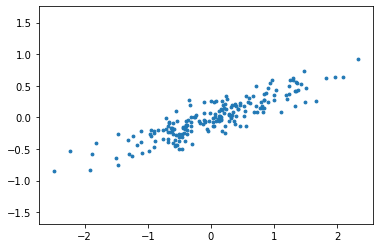

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=1, s=8)
plt.axis('equal');

This dataset is comprised of two dimensions. The first column is the X[:, 0] (which, in the graph, is represented by the x-axis) and the second column, X[:, 1] (which, in the graph, is represented by the y-axis).

If we think about the information contained in this data, we could imagine that the axis where the information is <b>really</b> contained is neighter x nor the y axis. It is, rather, an axis somewhere in between.

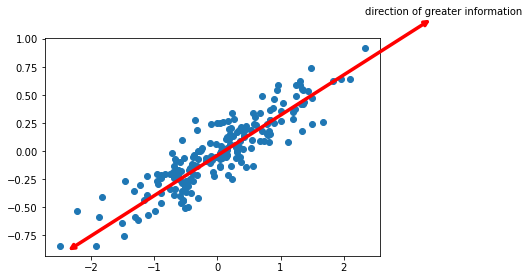

In [4]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=1)
plt.annotate('direction of greater information', xy=(min(X[:,0])+0.1, min(X[:,1])-.05), xytext=(max(X[:,0]), max(X[:,1])+0.3), arrowprops=dict(arrowstyle= '<->', color='red', lw=3.5, ls='-'));

Specifically, it seems to be a combination of both the first and second dimensions. Indeed, it is. 

The PCA algorithm will try to find the directions in which the most information is contained. By information, we always mean to say - variance.

Rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between your features (your `X`).

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

In [5]:
X.shape

(200, 2)

In [6]:
pd.DataFrame(X)

,0,1
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867
...,...,...
195,0.838409,0.278380
196,0.312708,-0.010600
197,1.955876,0.638224
198,-1.108304,-0.395054


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The <b>fit method</b> learns some quantities from the data, most importantly the "components" and "explained variance":

In [8]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

What do these components mean?

The first component is `pca.components_[0]`

In [9]:
pca.components_[0]

array([-0.94446029, -0.32862557])

In [10]:
pd.DataFrame(-0.94446029 * X[:, 0] -0.32862557 * X[:, 1], columns=['componente principal 1'])

,componente principal 1
0,0.646460
1,-1.101523
2,0.697603
3,2.279332
4,0.599743
...,...
195,-0.883326
196,-0.291857
197,-2.056984
198,1.176573


The first component of a PCA method is always the component that contains the most information. What this component is doing is taking what is called as `a linear combination of the original columns`. In this case, the results show that the PCA decided to take $-0.94$ of the first column (`X[:,0]`) and $-0.32$ of the second dimension (`X[:, 1]`). Let's take a look at the second component `pca.components_[1]`

In [11]:
pca.components_[1]

array([-0.32862557,  0.94446029])

This is telling us that the second component of our data (the second most important combination of features) is comprised by taking the first dimension and multiplying it by $-0.32$ and taking the second dimension and multiplying it by $0.94$.

### Explained Variance

Another important aspect of the results is the `explained_variance`. It can be obtained by the `pca.explained_variance` attibute.

In [12]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [13]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


In [14]:
pca.components_[0]

array([-0.94446029, -0.32862557])

For this case, we observe that only 1 component explains ~97% of the variance (information) in our data. It means that you can reduce the number of dimensions to 1, and it will still retain ~97% of its signal.

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]


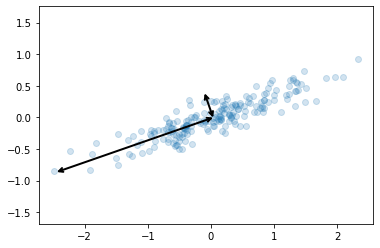

In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='<->', color='k',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    print(v0, v1)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

In [16]:
pca.transform(X)

array([[ 6.76769235e-01,  5.97386015e-02],
       [-1.07121393e+00,  2.57240064e-01],
       [ 7.27912364e-01, -1.68669939e-01],
       [ 2.30964136e+00,  2.44066575e-01],
       [ 6.30052323e-01, -3.04655713e-01],
       [ 1.02448887e+00,  7.56230140e-02],
       [ 7.77183507e-01, -8.34608477e-02],
       [-1.39656414e+00,  1.44518385e-01],
       [-2.91049874e-01, -2.01289478e-01],
       [ 1.88864221e+00,  2.31419563e-01],
       [-7.11544293e-01,  1.13426118e-01],
       [ 6.38884130e-01,  3.88212853e-02],
       [ 5.48059617e-01, -2.00775267e-01],
       [-2.19312436e-01,  2.08243673e-01],
       [-3.87789490e-01,  6.89135848e-02],
       [ 7.15219956e-01,  1.13841003e-01],
       [-1.08373816e+00,  7.78081042e-02],
       [-2.99917403e-01, -5.86382919e-02],
       [-7.96849021e-01,  2.44527383e-01],
       [-8.12568346e-01, -1.17341246e-01],
       [-1.54018281e+00, -3.24862050e-02],
       [-2.52920476e-01, -4.86012463e-02],
       [ 6.26464454e-01, -1.68045678e-01],
       [-1.

In [17]:
pc1 = pca.transform(X)[:,0]
pc2 = pca.transform(X)[:,1]

[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]
[0 0] [ 2.61969149e+00 -1.60409840e-16]
[0 0] [4.99411294e-17 4.07800269e-01]


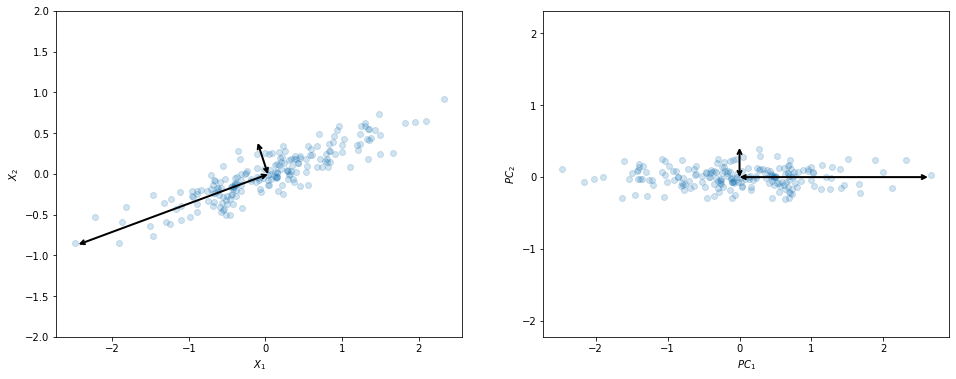

In [18]:
# plot data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
ax1.set_ylim([-2,2])


ax2.scatter(pc1, pc2, alpha=0.2, )
count = 0
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    count += np.pi/2
    draw_vector(np.array([0, 0]) , np.array([np.sin(count) * np.sqrt(length) * 3, -np.cos(count) * np.sqrt(length) * 3]) , ax=ax2)
    
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')

ax2.set_xlabel('$PC_1$')
ax2.set_ylabel('$PC_2$')
plt.axis('equal');

So what the PCA has done was effectively rotate the original features into a new dimension that was more suitable. Now, you have at the x-axis a variable that contains most of the information, and at the y-axis a variable that contains the following most information (although in this case it is so small).

# Applications

## PCA as dimensionality reduction

Example of using PCA as a dimensionality reduction transform: Instead of creating a PCA of two components, we observed we could have created a PCA with only 1 component, and it would still have 97% of our information within. Let's visualize it.

In [52]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


In [20]:
X_pca

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

In [21]:
X_new = pca.inverse_transform(X_pca)

In [22]:
X_new.shape

(200, 2)

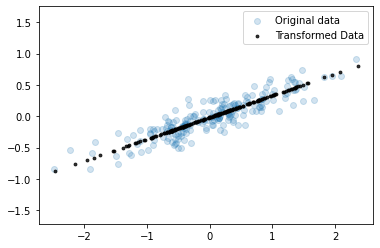

In [23]:

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, s=8, c='k')
plt.axis('equal');
plt.legend(['Original data','Transformed Data'])

The light points are the original data, while the dark points are the projected version.

The information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

In [24]:
pca.explained_variance_ratio_

array([0.97634101])

Of course, real life applications will contain much more columns to reduce from. 

### PCA for visualization: Iris Dataset

In [25]:
from sklearn.datasets import load_iris

In [26]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [30]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
pca = PCA(n_components=2)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca.fit(X_std)

PCA(n_components=2)

In [33]:
X_std.shape

(150, 4)

In [34]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [37]:
pca.explained_variance_ratio_.sum()

0.9581320720000164

In [38]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
X_std.shape

(150, 4)

In [40]:
pd.DataFrame(X_std)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [41]:
pd.DataFrame(pca.transform(X_std), columns=['pc1','pc2'])

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [42]:
pca.transform(X_std)[:, 0]

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [43]:
pc1 = pca.transform(X_std)[:,0]
pc2 = pca.transform(X_std)[:,1]

In [44]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'PC2')

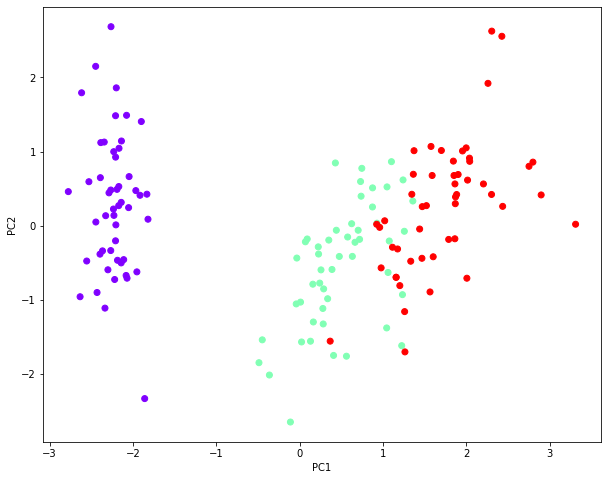

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(pc1, pc2, c=y, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [46]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
pca.components_[0]

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [48]:
pca.components_[1]

array([0.37741762, 0.92329566, 0.02449161, 0.06694199])

In [49]:
pd.DataFrame(X_std)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [50]:
list(zip(pca.components_[0], iris.feature_names))

[(0.5210659146701195, 'sepal length (cm)'),
 (-0.26934744250594356, 'sepal width (cm)'),
 (0.5804130957962945, 'petal length (cm)'),
 (0.5648565357793611, 'petal width (cm)')]

### Yellowbrick - visualization

In [51]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(X_std, columns=iris.feature_names))
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
iris.feature_names

In [ ]:
pca.components_

### 3D

In [ ]:
pca = PCA(n_components=3)
pca.fit(X_std)

pc1 = pca.transform(X_std)[:,0]
pc2 = pca.transform(X_std)[:,1]
pc3 = pca.transform(X_std)[:,2]

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d',)
ax.scatter3D(pc1, pc2, pc3, c=y, cmap='rainbow');
# TODO, guilherme disse que é 3D 2D

## US crime dataset

In [ ]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df_normalized = df.apply(lambda row : row / row['UrbanPop'], axis=1)
df_normalized = df_normalized.drop('UrbanPop', axis=1)

In [ ]:
df.sort_values(by='UrbanPop')

In [ ]:
pca = PCA(2)

X_std = StandardScaler().fit_transform(df)
pca.fit(X_std)

In [ ]:
pc1 = pca.transform(X_std)[:, 0]
pc2 = pca.transform(X_std)[:, 1]

In [ ]:
plt.scatter(pc1, pc2)

In [ ]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, proj_features=True)
components = visualizer.fit_transform(df)

for i, name in enumerate(df.index):
    visualizer.ax.annotate(name, (components[i, 0]+0.1, components[i, 1]-.1))
    
visualizer.show()



In [ ]:
pd.DataFrame(zip(pca.components_[0], pca.components_[1], df.columns), columns=['pc1','pc2','columns'])

## Defaulters

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

visualizer = PCA(scale=True, classes=classes, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaler.fit_transform(X))

In [ ]:
pc1 = pca.transform(scaler.fit_transform(X))[:, 0]

pc2 = pca.transform(scaler.fit_transform(X))[:, 1]

In [ ]:
plt.scatter(pc1, pc2, c=y, cmap='viridis')

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
X.shape

In [ ]:
pd.DataFrame(zip(pca.components_[0], pca.components_[1], X.columns), columns=['pc1','pc2','columns']).sort_values(by='pc1')

## PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
load_digits().data[0]

In [ ]:
pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(64)])

In [ ]:
digits.data.shape

In [ ]:
digits.data.max()

In [ ]:
digits.data[155, :]

In [ ]:
digits.data[155, :].reshape(8,8)

In [ ]:
digits.target[155]

In [ ]:
digits.target[1022]

In [ ]:
plt.imshow(digits.data[1022, :].reshape(8,8))

In [ ]:
plt.imshow(digits.data[0, :].reshape(8,8), cmap='binary')

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.array(digits.data[123].reshape(8,8)), cmap='Blues')

In [ ]:
digits.target[123]

In [ ]:
X = pd.DataFrame(digits.data, columns=[f'pixel_{i}' for i in range(64)])
X.head()

In [ ]:
X

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [ ]:
pca = PCA(2) 

scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

pca.fit(X_std)
pca.n_components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

## Transform from 64 variables to 2 variables

In [ ]:
pc1 = pca.transform(X_std)[:, 0]
pc2 = pca.transform(X_std)[:, 1]

In [ ]:
import pandas as pd
df = pd.DataFrame({'pc1': pc1, 'pc2':pc2})
df

In [ ]:
pca.components_

We can now plot the first two principal components of each point to learn about the data:

In [ ]:
plt.scatter(pc1, pc2)

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(df['pc1'], df['pc2'],
            c=digits.target, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar();

In [ ]:
plt.imshow(pca.components_[0].reshape(8,8))

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

In [ ]:
pca = PCA(n_components=.8)
pca.fit(X_std)

In [ ]:
pca.n_components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
plt.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)

In [ ]:
digits.data[0].reshape(8,8)

Now lets add some random noise to create a noisy dataset, and re-plot it:

## Add noise to our data

We'll use `np.random.normal` to create random numbers that follow a normal distribution. That is, if the number is 15 for example, we will switch it by a value picked from a normal distribution that has the mean centered at 15, with a standard deviation specified by us.

In [ ]:
np.random.normal(loc=0)

In [ ]:
plot_digits(digits.data)

In [ ]:
np.random.seed(42)
noisy = np.random.normal(loc=digits.data, scale=3)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [ ]:
pca = PCA(0.5)
pca.fit(noisy)

pca.n_components_

The results show that 9 components are necessary to preserve 50% of the information.

Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

In [ ]:
plot_digits(noisy)

In [ ]:
pc = pca.transform(noisy)
filtered = pca.inverse_transform(pc)
plot_digits(filtered)

In [ ]:
noisy

In [ ]:
noisy.shape

In [ ]:
pca.transform(noisy)

In [ ]:
pca.transform(noisy).shape

In [ ]:
resultado_em_9_dimensoes = pca.transform(noisy)

In [ ]:
pca.inverse_transform(resultado_em_9_dimensoes)

In [ ]:
plt.imshow(noisy[3].reshape(8,8))

In [ ]:
plt.imshow(pca.inverse_transform(resultado_em_9_dimensoes)[3].reshape(8,8))

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## What are the components?